# Tutorial 3: Parameter Learning
We can learn the weights of an SPN for generative problems using hard EM learning.

In [1]:
import libspn as spn
import tensorflow as tf

## Build the SPN

In [2]:
indicator_leaves = spn.IndicatorLeaf(
    num_vars=2, num_vals=2, name="indicator_x")

# Generate random structure with 1 decomposition per product layer
# 2 subsets of variables per product (so 2 children) and 2 sums/mixtures per scope
dense_spn_generator = spn.DenseSPNGenerator(num_decomps=1, num_subsets=2, num_mixtures=2)
root = dense_spn_generator.generate(indicator_leaves)

# Connect a latent indicator
indicator_y = root.generate_latent_indicators(name="indicator_y") # Can be added manually

# Generate weights
spn.generate_weights(root, initializer=tf.initializers.random_uniform()) # Can be added manually

[WARNING] [tensorflow:__getattr__] From /home/jos/spn/libspn/libspn/graph/node.py:40: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

[WARNING] [tensorflow:__getattr__] From /home/jos/spn/libspn/libspn/graph/leaf/indicator.py:63: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



## Visualize the SPN Graph
The visualization below uses `graphviz`. Depending on your setup (e.g. `jupyter lab` vs. `jupyter notebook`) this might fail to show. At least `Chrome` + `jupyter notebook` seems to work.

In [3]:
# Visualize SPN graph
spn.display_spn_graph(root)

## Specify Training Data

In [4]:
indicator_x_data = [[0,0],[0,0],[1,1],[1,1],[1,1],[0,1],[0,1],[0,1]]
indicator_y_data =[[-1]] * len(indicator_x_data)

## Add Learning Ops

In [5]:
hard_em_learning = spn.HardEMLearning(root=root)
update_op = hard_em_learning.accumulate_and_update_weights()
llh_op = tf.reduce_mean(root.get_log_value())

[WARNING] [tensorflow:__getattr__] From /home/jos/spn/libspn/libspn/graph/leaf/indicator.py:91: The name tf.log is deprecated. Please use tf.math.log instead.

[WARNING] [tensorflow:new_func] From /home/jos/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py:2403: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[WARNING] [tensorflow:new_func] From /home/jos/spn/libspn/libspn/graph/op/base_sum.py:658: multinomial (from tensorflow.python.ops.random_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.random.categorical` instead.
[WARNING] [tensorflow:__getattr__] From /home/jos/spn/libspn/libspn/learning/em.py:91: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

[WARNING] [tensorflow:__getattr__] From /home/jos/spn/libspn

In [6]:
num_epochs = 20

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    likelihoods = []
    
    for epoch in range(num_epochs):
        likelihood, _ = sess.run(
            [llh_op, update_op], 
            feed_dict={indicator_leaves: indicator_x_data, indicator_y: indicator_y_data}
        )
        likelihoods.append(likelihood)
        
        print("Avg. Likelihood: %s" % (likelihood,))

Avg. Likelihood: -1.3665967
Avg. Likelihood: -1.207653
Avg. Likelihood: -1.163633
Avg. Likelihood: -1.142268
Avg. Likelihood: -1.1297168
Avg. Likelihood: -1.1214797
Avg. Likelihood: -1.1156663
Avg. Likelihood: -1.1113467
Avg. Likelihood: -1.1080122
Avg. Likelihood: -1.1053607
Avg. Likelihood: -1.1032022
Avg. Likelihood: -1.1014113
Avg. Likelihood: -1.0999012
Avg. Likelihood: -1.098611
Avg. Likelihood: -1.0974958
Avg. Likelihood: -1.0965226
Avg. Likelihood: -1.0956655
Avg. Likelihood: -1.0949051
Avg. Likelihood: -1.094226
Avg. Likelihood: -1.0936158


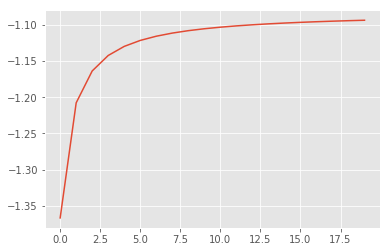

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(likelihoods)
plt.show()